<a href="https://colab.research.google.com/github/sonali6062/Deep-Learning/blob/main/Complex_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Model
from keras.layers import Input,Flatten,Dense,concatenate

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [3]:
input_layer=Input(shape=(28,28))
flatten=Flatten()(input_layer) # Pass input_layer to Flatten

# Connect the first Dense layers to the flattened input
hidden1=Dense(128,activation='relu')(flatten)
hidden2=Dense(160,activation='relu')(flatten)

hidden11=Dense(64,activation='relu')(hidden1)
merge=concatenate([hidden11,hidden2])
output_layer=Dense(10,activation='softmax')(merge)
#setting up the layers. How they're going to communicate with each other

In [4]:
model=Model(inputs=input_layer,outputs=output_layer)

In [5]:
# Display model summary
# This shows the layers of the model, their output shapes, and the number of parameters.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    100,480 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 160)       │    125,600 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 224)       │          0 │ dense_2[0][0],    │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │      2,250 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 236,586 (924.16 KB)

 Trainable params: 236,586 (924.16 KB)

 Non-trainable params: 0 (0.00 B)

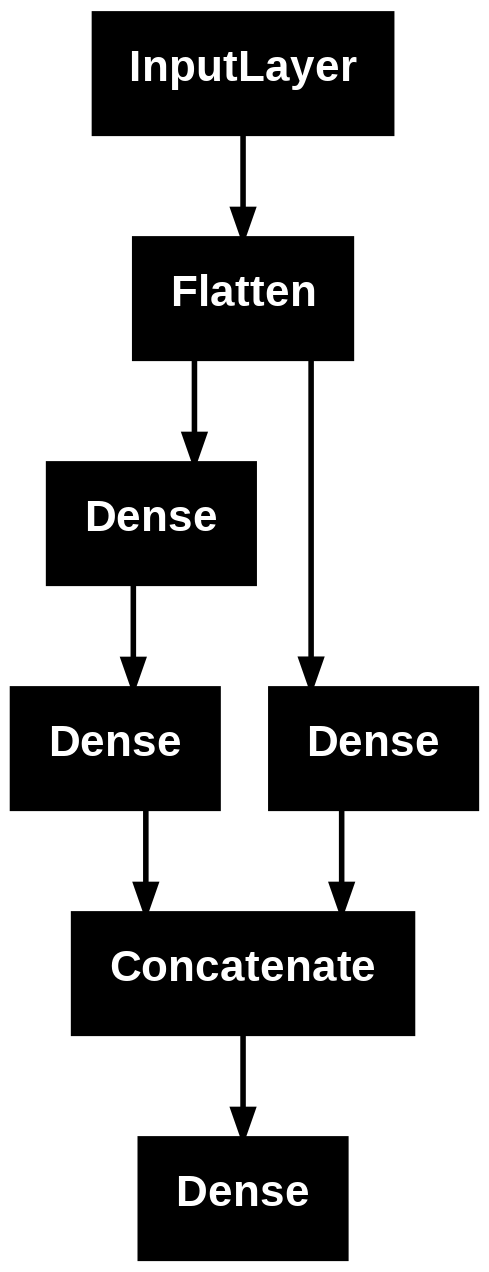

In [6]:
#  Visualize the model architecture
# This generates a visual representation of the model's structure.
from keras.utils import plot_model
plot_model(model)

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
# Model Training
# trains the compiled model using the prepared training data.
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 17s - 9ms/step - accuracy: 0.9371 - loss: 0.2131
Epoch 2/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9729 - loss: 0.0885
Epoch 3/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9811 - loss: 0.0595
Epoch 4/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9865 - loss: 0.0423
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9895 - loss: 0.0323


In [9]:
# Model Evaluation
# evaluates the trained model on the test dataset to assess its performance.
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0781


[0.06786549836397171, 0.9807999730110168]